# Geological Mapping

In [29]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import folium

In [30]:
dataset=pd.read_csv("assets/wipeout.csv")
dataset.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
0,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
1,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
3,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
4,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


In [31]:
# Using the default matplotlib library we will set the size of the plot we want using the rcParams['figure.figsize'] attribute.
mlt.rcParams['figure.figsize']=[16.0,8.0]

In [32]:
#Now here we are talking about geographical ploting. So the most important thing to use while plotting is the X and Y axis
#which are represented by longitude and latitude respectively.

#So when we use the current data, the most important indexes to be used while plotting are position_lat_degrees and 
#position_long_degrees.

#Now but when we plot locations on a map, what we are actually doing is converting a 3D representation to a 2D one. Hence we 
#need to use pre-defined projections techiques to plot it perfectly. One such projection technique is Mercantor projection.
#In mercantor projection, the longitude is left as it is though the latitude is changed. Let see how we do it.
import math
def lat2y(a):
  return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))
dataset["position_lat_degrees_mercantor"]=dataset["position_lat_degrees"].apply(lat2y)

#Lets remove the fractional_cadence column as it only contains NaN

dat1=dataset.drop('fractional_cadence',inplace=True,axis=1)
dat2=dataset.drop('cadence',inplace=True,axis=1)
dat3=dataset.drop('speed',inplace=True,axis=1)

#Lets drop rest of nan containing rows

dataset=dataset.dropna()

In [37]:
dataset.head()

,timestamp,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,timestamp.1,position_lat_degrees,position_long_degrees,position_lat_degrees_mercantor
0,2019-11-01 20:12:03,0.00,281.6,0.000,84.0,504424439.0,-999065791.0,2019-11-01 20:12:03,42.280368,-83.740727,46.739975
1,2019-11-01 20:12:04,0.00,281.6,0.000,84.0,504424439.0,-999065791.0,2019-11-01 20:12:04,42.280368,-83.740727,46.739975
2,2019-11-01 20:12:07,0.00,281.6,0.000,87.0,504424439.0,-999065791.0,2019-11-01 20:12:07,42.280368,-83.740727,46.739975
3,2019-11-01 20:12:08,0.32,281.6,1.036,88.0,504424447.0,-999065835.0,2019-11-01 20:12:08,42.280369,-83.740731,46.739976
4,2019-11-01 20:12:10,3.30,281.8,2.976,89.0,504424476.0,-999066382.0,2019-11-01 20:12:10,42.280371,-83.740777,46.739979


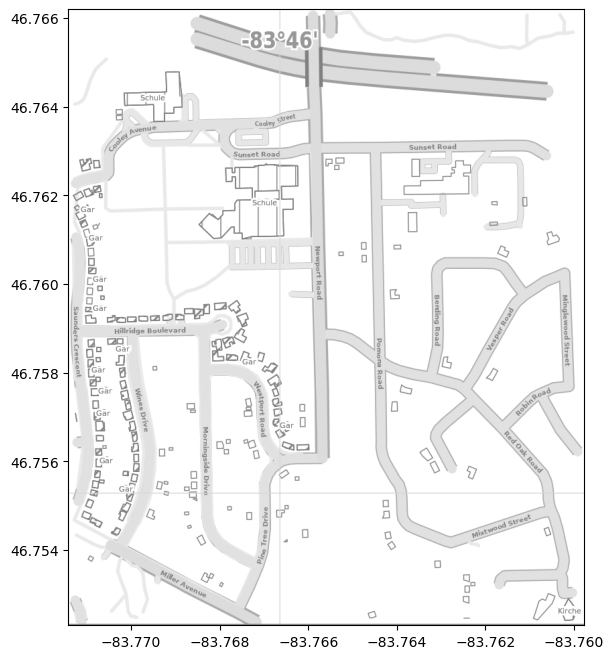

In [35]:
#Next step is geological plotting. Now geological plotting requires maps on which we will plot. Now there are two ways, 
#either we bring new maps, or use a picture of map of the location we are using. Now lets see method1.

image=plt.imread("assets/map.png")

plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])

Text(0.5, 1.0, 'Heart Beat')

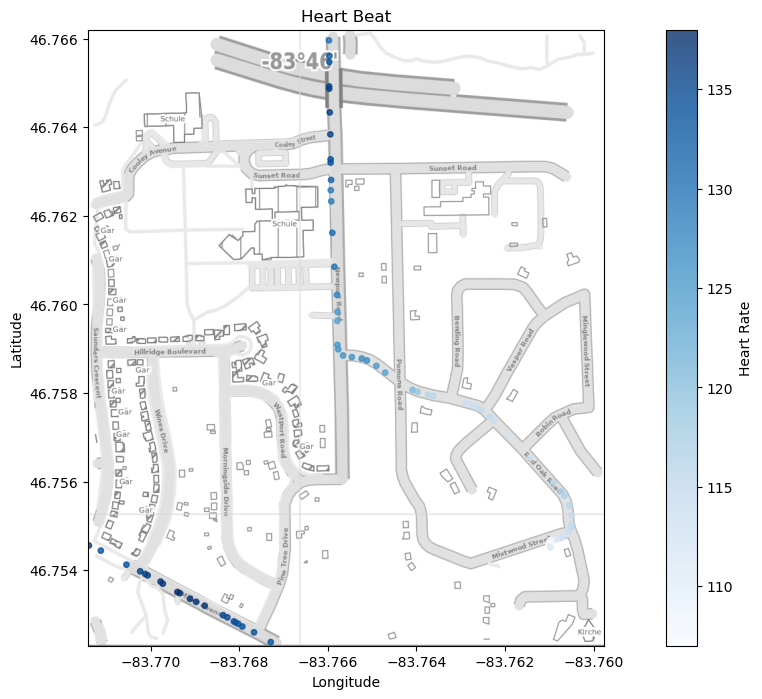

In [45]:
#Let plot.
image=plt.imread("assets/map.png")
plt.imshow(image, alpha=0.5, extent=[-83.77141,-83.75977,46.75230,46.76620])
#Now we have set our extent above. So what we need is that our dataset also follows up on that extent. So lets do it.
newSet=dataset[(dataset['position_lat_degrees_mercantor']>46.75230)&
          (dataset['position_lat_degrees_mercantor']<46.76620)&
          (dataset['position_long_degrees']>-83.77141)&
          (dataset['position_long_degrees']<-83.75977)]
plt.scatter(newSet['position_long_degrees'],newSet['position_lat_degrees_mercantor'],c=newSet['heart_rate'],s=15,cmap='Blues',alpha=0.8)
plt.colorbar().set_label('Heart Rate')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Heart Beat')

In [47]:
#Method. Plotting via an actually map. For that we folium library. This is how we do it.
m=folium.Map(location=[42.24,-83.764], zoom_start=12)
display(m)

In [50]:

m=folium.Map(location=[42.296,-83.768], zoom_start=15)
folium.Marker([dataset["position_lat_degrees"].iloc[0],dataset["position_long_degrees"].iloc[0]], 
              popup="Start").add_to(m)
folium.Marker([dataset["position_lat_degrees"].iloc[-1],dataset["position_long_degrees"].iloc[-1]], 
              popup="Stop").add_to(m)
route=folium.PolyLine(locations=zip(dataset["position_lat_degrees"],dataset["position_long_degrees"]),
                    weight=5,color='blue').add_to(m)
display(m)